In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from sklearn.metrics import auc

In [6]:
# File path of the CSV files for DNN
high_dnn_path = "high_dnn_roc.csv"
medium_dnn_path = "medium_dnn_roc.csv"
low_dnn_path = "low_dnn_roc.csv"

# File path of the CSV files fo BDT
high_bdt_path = "high_xgboost_roc.csv"
medium_bdt_path = "medium_xgboost_roc.csv"
low_bdt_path = "low_xgboost_roc.csv"

# Read the CSV file into a numpy array (skipping the header)
high_dnn_data = np.genfromtxt(high_dnn_path, delimiter=',', skip_header=1)
medium_dnn_data = np.genfromtxt(medium_dnn_path, delimiter=',', skip_header=1)
low_dnn_data = np.genfromtxt(low_dnn_path, delimiter=',', skip_header=1)

high_bdt_data = np.genfromtxt(high_bdt_path, delimiter=',', skip_header=1)
medium_bdt_data = np.genfromtxt(medium_bdt_path, delimiter=',', skip_header=1)
low_bdt_data = np.genfromtxt(low_bdt_path, delimiter=',', skip_header=1)

# Column 0 is tpr, Column 1 is for

# DNN
tpr_dnn_high = high_dnn_data[:, 0]
fpr_dnn_high = high_dnn_data[:, 1]
tpr_dnn_medium = medium_dnn_data[:, 0]
fpr_dnn_medium = medium_dnn_data[:, 1]
tpr_dnn_low = low_dnn_data[:, 0]
fpr_dnn_low = low_dnn_data[:, 1]

# BDT
tpr_bdt_high = high_bdt_data[:, 0]
fpr_bdt_high = high_bdt_data[:, 1]
tpr_bdt_medium = medium_bdt_data[:, 0]
fpr_bdt_medium = medium_bdt_data[:, 1]
tpr_bdt_low = low_bdt_data[:, 0]
fpr_bdt_low = low_bdt_data[:, 1]

# Compute ROC area under the curve
roc_auc_high_dnn = auc(fpr_dnn_high, tpr_dnn_high)
roc_auc_medium_dnn = auc(fpr_dnn_medium, tpr_dnn_medium)
roc_auc_low_dnn = auc(fpr_dnn_low, tpr_dnn_low)

roc_auc_high_bdt = auc(fpr_bdt_high, tpr_bdt_high)
roc_auc_medium_bdt = auc(fpr_bdt_medium, tpr_bdt_medium)
roc_auc_low_bdt = auc(fpr_bdt_low, tpr_bdt_low)

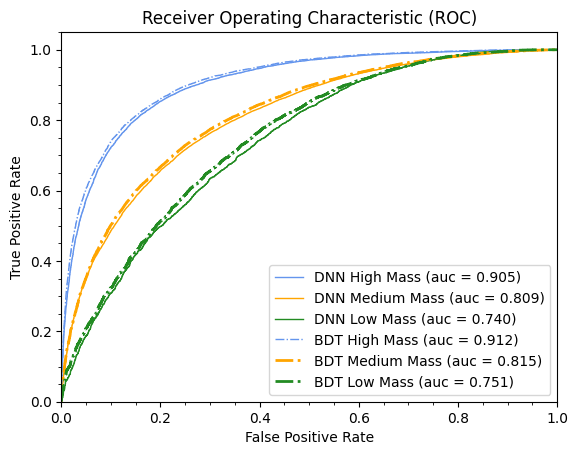

In [8]:
# Plot ROC curve
fig, ax = plt.subplots()

ax.plot(fpr_dnn_high, tpr_dnn_high, color='cornflowerblue', lw=1, label='DNN High Mass (auc = %0.3f)' % roc_auc_high_dnn)
ax.plot(fpr_dnn_medium, tpr_dnn_medium, color='orange', lw=1, label='DNN Medium Mass (auc = %0.3f)' % roc_auc_medium_dnn)
ax.plot(fpr_dnn_low, tpr_dnn_low, color='forestgreen', lw=1, label='DNN Low Mass (auc = %0.3f)' % roc_auc_low_dnn)

ax.plot(fpr_bdt_high, tpr_bdt_high, color='cornflowerblue', linestyle='-.', lw=1, label='BDT High Mass (auc = %0.3f)' % roc_auc_high_bdt)
ax.plot(fpr_bdt_medium, tpr_bdt_medium, color='orange', linestyle='-.', lw=2, label='BDT Medium Mass (auc = %0.3f)' % roc_auc_medium_bdt)
ax.plot(fpr_bdt_low, tpr_bdt_low, color='forestgreen', linestyle='-.', lw=2, label='BDT Low Mass (auc = %0.3f)' % roc_auc_low_bdt)

#ax.plot([0, 1], [0, 1], color='lightgray', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC)')
ax.legend(loc="lower right")

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.2/4))
ax.yaxis.set_minor_locator(MultipleLocator(0.2/4))

plt.savefig("dnn_plots/dnn_roc_curve_all.png",dpi=200)
plt.show()